In [57]:
import numpy as np
import matplotlib.pyplot as plt
import random
from statistics import mean
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

[[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667 0.         0.         0.         0.         0.        ]
 [0.         0.         0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667 0.16666667 0.         0.         0.         0.        ]
 [0.         0.         0.         0.16666667 0.16666667 0.16666667
  0.16666667 0.16666667 0.16666667 0.         0.         0.        ]
 [0.         0.         0.         0.         0.16666667 0.16666667
  0.16666667 0.16666667 0.16666667 0.16666667 0.         0.        ]
 [0.         0.         0.         0.         0.         0.16666667
  0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]]
[[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667]
 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667]
 [0.         0.      

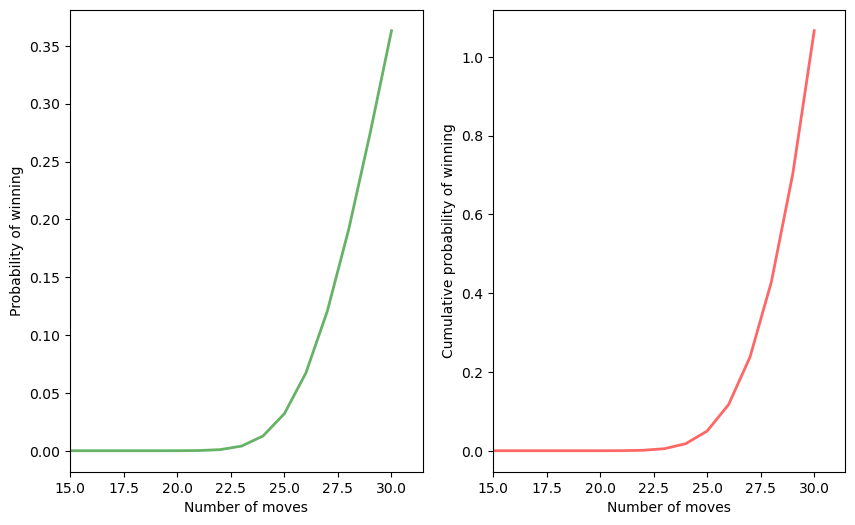

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

# House rules: you don't need to land on 100, just reach it.
#T[95:100,100] += np.linspace(1/6, 5/6, 5)
for i in range(95,101):
    T[i,i] = (i-94)/6

print(T[0:6,0:12])
print(T[94:100,94:101])

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

n, P, C = 0, [], []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.99999:
    n += 1
    v = v.dot(T)
    P.append(v[100])
    cumulative_prob += P[-1]
    C.append(cumulative_prob)
    
mode = np.argmax(P)+1
print('modal number of moves:', mode)

# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,n,n), P, 'g', lw=2, alpha=0.6)
ax[0].set_xlim(15)
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,n,n), C, 'r', lw=2, alpha=0.6)
ax[1].set_xlim(15)
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')


plt.show()

modal number of moves: 21


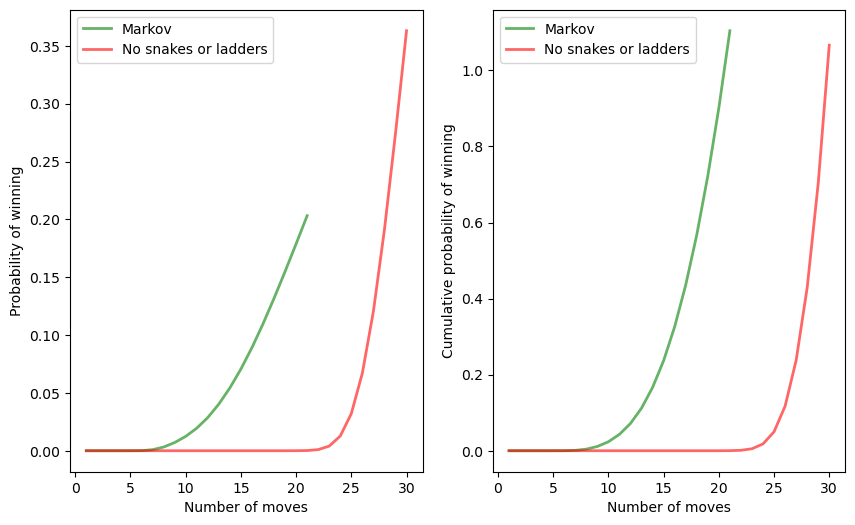

In [59]:
import numpy as np
import matplotlib.pyplot as plt

ladders = [(3,19), (15,37), (22,42), (25,64), (41,73),
           (53,74), (63,86), (76,91), (84,98)]
snakes = [(11,7), (18,13), (28,12), (36,34), (77,16),
          (47,26), (83,39), (92,75), (99,70)]
trans = ladders + snakes

# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

for (i1,i2) in trans:
    iw = np.where(T[:,i1] > 0)
    T[:,i1] = 0
    T[iw,i2] += 1/6

# House rules: you don't need to land on 100, just reach it.
#T[95:100,100] += np.linspace(1/6, 5/6, 5)
for i in range(95,101):
    T[i,i] = (i-94)/6
    
for snake in snakes:
    T[snake,100] = 0

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

ns, Ps, Cs = 0, [], []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.99999:
    ns += 1
    v = v.dot(T)
    Ps.append(v[100])
    cumulative_prob += Ps[-1]
    Cs.append(cumulative_prob)
    
mode = np.argmax(Ps)+1
print('modal number of moves:', mode)

# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,ns,ns), Ps, 'g-', lw=2, alpha=0.6, label='Markov')
ax[0].plot(np.linspace(1,n,n), P, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[0].legend()
ax[1].plot(np.linspace(1,ns,ns), Cs, 'g-', lw=2, alpha=0.6, label='Markov')
ax[1].plot(np.linspace(1,n,n), C, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')
ax[1].legend()

plt.show()

## Time to create a single player simulation of the game

In [60]:
def one_player_game(snake_ladder=False):
    start = 0
    end = 100
    current = start
    counter = 0
    
    ladders = [(3,19), (15,37), (22,42), (25,64), (41,73),
               (53,74), (63,86), (76,91), (84,98)]
    snakes = [(11,7), (18,13), (28,12), (36,34), (77,16),
              (47,26), (83,39), (92,75), (99,70)]
    
    while current < end:
        roll = int(random.uniform(1, 7))
        while roll > end - current:
            roll = int(random.uniform(1,7))
            counter += 1
        
        current += roll
        counter += 1
        
        if snake_ladder is True:
            for i,j in ladders:
                if current == i:
                    current = j
                    
            for i, j in snakes:
                if current == i:
                    current = j
                
        print(current, "|", counter)
        
    return counter

In [61]:
no_snakes = one_player_game(snake_ladder=False)

1 | 1
7 | 2
12 | 3
17 | 4
22 | 5
23 | 6
25 | 7
28 | 8
30 | 9
36 | 10
37 | 11
38 | 12
41 | 13
45 | 14
50 | 15
55 | 16
57 | 17
58 | 18
61 | 19
66 | 20
72 | 21
75 | 22
80 | 23
81 | 24
83 | 25
87 | 26
88 | 27
94 | 28
96 | 29
100 | 31


In [62]:
yes_snakes = one_player_game(snake_ladder=True)

5 | 1
7 | 2
8 | 3
10 | 4
37 | 5
42 | 6
46 | 7
49 | 8
74 | 9
79 | 10
85 | 11
91 | 12
96 | 13
97 | 14
98 | 15
70 | 19
71 | 20
91 | 21
93 | 22
94 | 23
95 | 24
100 | 25


In [63]:
print(no_snakes)
print(yes_snakes)

31
25


## lets run some simulations for the one player game and compare to the markov chain predictions

In [64]:
num_runs = 1000
no_snakes_ladders = []
yes_snakes_ladders = []

for i in range(num_runs):
    count = one_player_game(snake_ladder=False)
    no_snakes_ladders.append(count)
    count = one_player_game(snake_ladder=True)
    yes_snakes_ladders.append(count)
    
print(mean(no_snakes_ladders))
print(mean(yes_snakes_ladders))



2 | 1
5 | 2
7 | 3
9 | 4
14 | 5
16 | 6
17 | 7
20 | 8
25 | 9
26 | 10
31 | 11
37 | 12
38 | 13
43 | 14
48 | 15
49 | 16
53 | 17
59 | 18
60 | 19
65 | 20
67 | 21
69 | 22
72 | 23
75 | 24
81 | 25
85 | 26
87 | 27
90 | 28
93 | 29
94 | 30
95 | 31
99 | 32
100 | 35
19 | 1
21 | 2
42 | 3
26 | 4
29 | 5
31 | 6
34 | 7
39 | 8
73 | 9
75 | 10
81 | 11
82 | 12
87 | 13
88 | 14
89 | 15
91 | 16
97 | 17
70 | 18
74 | 19
91 | 20
95 | 21
96 | 25
100 | 26
4 | 1
7 | 2
9 | 3
11 | 4
16 | 5
21 | 6
26 | 7
29 | 8
34 | 9
36 | 10
40 | 11
42 | 12
46 | 13
47 | 14
49 | 15
53 | 16
56 | 17
58 | 18
61 | 19
67 | 20
69 | 21
72 | 22
75 | 23
81 | 24
82 | 25
88 | 26
89 | 27
91 | 28
95 | 29
99 | 30
100 | 34
1 | 1
6 | 2
7 | 3
13 | 4
19 | 5
23 | 6
12 | 7
16 | 8
21 | 9
24 | 10
29 | 11
31 | 12
35 | 13
73 | 14
75 | 15
81 | 16
85 | 17
86 | 18
87 | 19
75 | 20
80 | 21
81 | 22
86 | 23
90 | 24
95 | 25
70 | 27
73 | 28
75 | 29
79 | 30
82 | 31
39 | 32
42 | 33
43 | 34
45 | 35
49 | 36
54 | 37
60 | 38
86 | 39
88 | 40
89 | 41
90 | 42
96 | 43
97 | 44
100

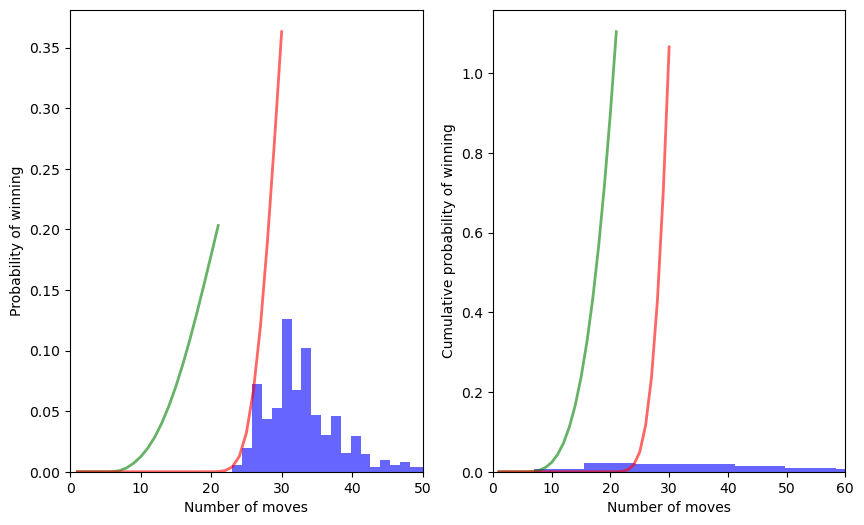

In [65]:
# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots(1,2)
ax[0].hist(no_snakes_ladders, bins=25, density=True, alpha=0.6, color='b') 
ax[0].plot(np.linspace(1,ns,ns), Ps, 'g-', lw=2, alpha=0.6, label='Markov')
ax[0].plot(np.linspace(1,n,n), P, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[0].set_xlim(0,50)
ax[1].hist(yes_snakes_ladders, bins=25, density=True, alpha=0.6, color='b') 
ax[1].plot(np.linspace(1,ns,ns), Cs, 'g-', lw=2, alpha=0.6, label='Markov')
ax[1].plot(np.linspace(1,n,n), C, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')
ax[1].set_xlim(0,60)

plt.show()

### the histogram of the number of moves for no snakes and ladders follows the curve of the no snakes and ladders model

## Now for the two player simulation

In [66]:
def two_player_game(snake_ladder=False):
    start = 0
    end = 100
    current_a = start
    current_b = start
    counter_a = 0
    counter_b = 0
    
    ladders = [(3,19), (15,37), (22,42), (25,64), (41,73),
               (53,74), (63,86), (76,91), (84,98)]
    snakes = [(11,7), (18,13), (28,12), (36,34), (77,16),
              (47,26), (83,39), (92,75), (99,70)]
    
    while current_a < end:
        roll = int(random.uniform(1, 7))
        while roll > end - current_a:
            roll = int(random.uniform(1,7))
            counter_a += 1
        
        current_a += roll
        counter_a += 1
        
        if snake_ladder is True:
            for i, j in ladders:
                if current_a == i:
                    current_a = j
                    
            for i, j in snakes:
                if current_a == i:
                    current_a = j
        
        if current_a == end:
            return "player 1", counter_a
        
        else:
            roll = int(random.uniform(1,7))
            while roll > end - current_b:
                roll = int(random.uniform(1,7))
                counter_b += 1
                
            current_b += roll
            counter_b += 1
            
            if snake_ladder is True:
                for i,j in ladders:
                    if current_b == i:
                        current_b = j
                        
                for i, j in snakes:
                    if current_b == i:
                        current_b = j
                        
            if current_b == end:
                return "player 2", counter_b

In [67]:
winner, count = two_player_game(snake_ladder=False)

In [68]:
print(winner, "|", count)

player 1 | 28


In [69]:
num_runs = 1000
no_snakes_ladders_two_player = []
yes_snakes_ladders_two_player = []

for i in range(num_runs):
    player, count = two_player_game(snake_ladder=False)
    no_snakes_ladders_two_player.append(count)
    player, count = two_player_game(snake_ladder=True)
    yes_snakes_ladders_two_player.append(count)
    
print(mean(no_snakes_ladders_two_player))
print(mean(yes_snakes_ladders_two_player))



31.291
28.63


## Lets compare the one player and two player results

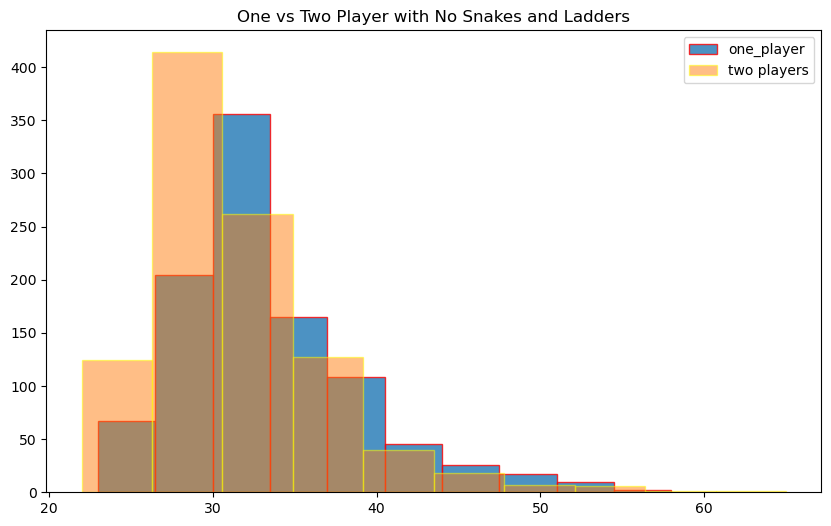

In [70]:

# plotting first histogram
plt.hist(no_snakes_ladders, label='one_player', alpha=.8, edgecolor='red')
 
# plotting second histogram
plt.hist(no_snakes_ladders_two_player, label='two players', alpha=0.5, edgecolor='yellow')
plt.legend()
plt.title("One vs Two Player with No Snakes and Ladders")
 
# Showing the plot using plt.show()
plt.show()

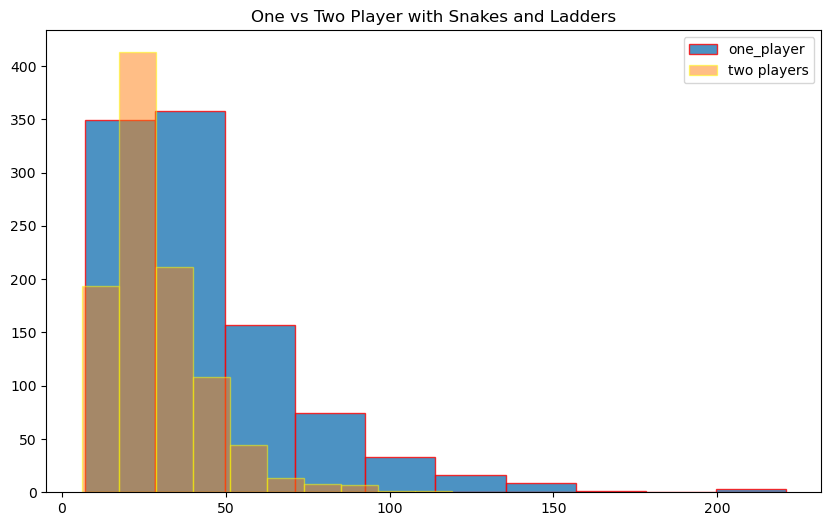

In [71]:

# plotting first histogram
plt.hist(yes_snakes_ladders, label='one_player', alpha=.8, edgecolor='red')
 
# plotting second histogram
plt.hist(yes_snakes_ladders_two_player, label='two players', alpha=0.5, edgecolor='yellow')
plt.legend()
plt.title("One vs Two Player with Snakes and Ladders")

 
# Showing the plot using plt.show()
plt.show()

### It seems that two player games get resolved in less turns than a one player game. This is what I expected.